In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from Approximators import Bernstein, LinearizedBernstein
from Approximators.Polynomials import LegendrePolynomial, ChebyshevPolynomial

# Single Function

In [3]:
f = lambda x: np.sqrt(abs(x - 0.5))

In [4]:
n = 6
optimizer = Bernstein.CauchySimplex(n=n, m=n, verbose=True)

x = np.linspace(0, 1, 200)
y = f(x)

optimizer.fit(x, y);

4: L-2 2.194473e-01: L-inf 9.505643e-02


In [5]:
x_vals = np.linspace(0, 1, 1000)

legendre_diff = optimizer.denominator(x_vals) - optimizer.w_as_legendre_coef() @ LegendrePolynomial(n, x_vals)
np.max(abs(legendre_diff))

4.163336342344337e-15

In [6]:
chebyshev_diff = optimizer.denominator(x_vals) - optimizer.w_as_chebyshev_coef() @ ChebyshevPolynomial(n, x_vals)
np.max(abs(chebyshev_diff))

5.214578768786282e-15

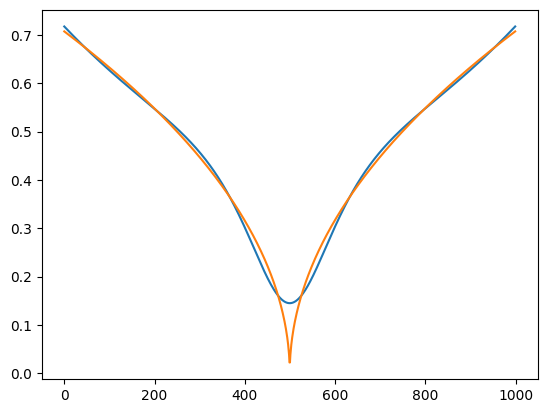

In [7]:
plt.plot(optimizer(x_vals))
plt.plot(f(x_vals))

# Multiple Functions

In [8]:
functions = [lambda x: abs(2 * (x - 0.5)), 
             lambda x: np.arctan(10 * (x - 0.5)),
             lambda x: (x - 0.8) ** 2]

In [9]:
n = 10
optimizer = Bernstein.CauchySimplex(n=n, m=n, verbose=True)

x = np.linspace(0, 1, 1000)
y = [f(x) for f in functions]

optimizer.fit(x, y);

29: L-2 (9.092320e-02, 7.070412e-02, 1.071833e-04): L-inf (2.142379e-02, 4.908317e-03, 1.733868e-05)


In [10]:
x_vals = np.linspace(0, 1, 1000)

legendre_diff = optimizer.denominator(x_vals) - optimizer.w_as_legendre_coef() @ LegendrePolynomial(n, x_vals)
np.max(abs(legendre_diff))

5.5844218138645374e-14

In [11]:
chebyshev_diff = optimizer.denominator(x_vals) - optimizer.w_as_chebyshev_coef() @ ChebyshevPolynomial(n, x_vals)
np.max(abs(chebyshev_diff))

6.517009154549669e-14

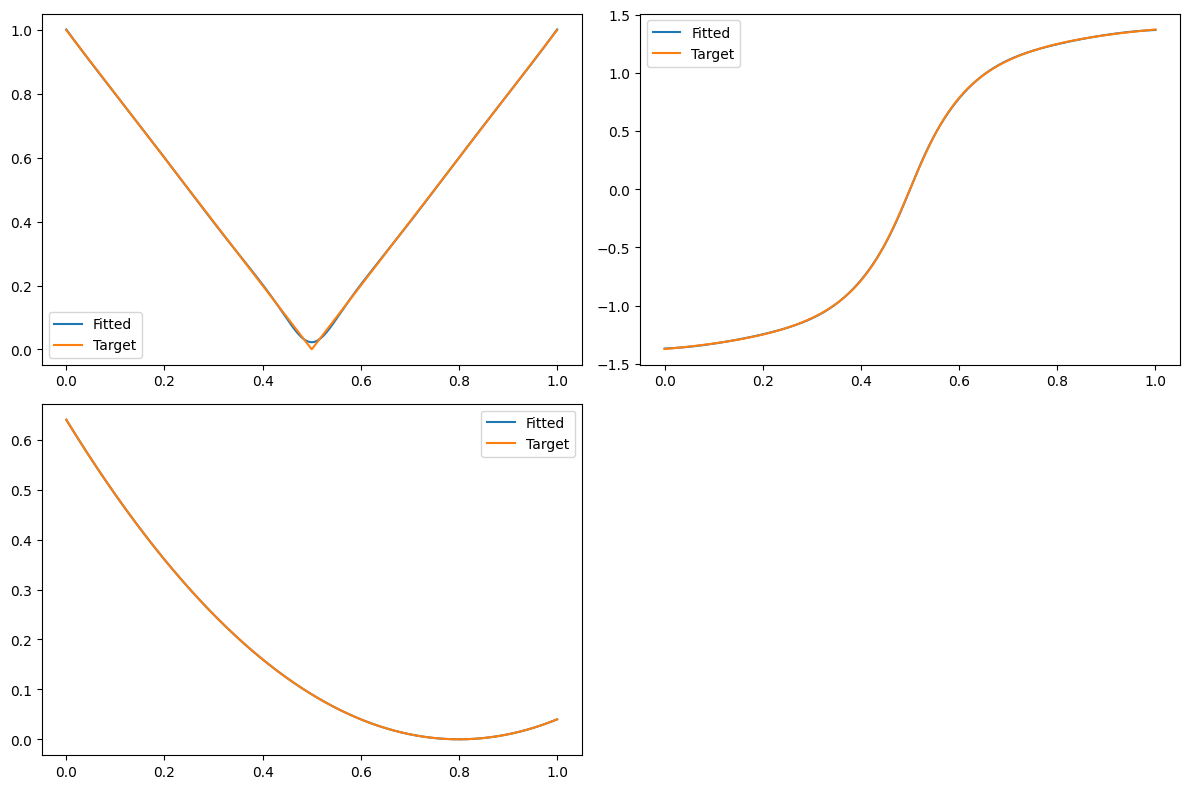

In [12]:
fitted_values = optimizer(x_vals)
target_values = [f(x_vals) for f in functions]

plt.figure(figsize=(12, 8))
i = 0
for fit, target in zip(fitted_values, target_values):
    plt.subplot(2, 2, i + 1)
    plt.plot(x_vals, fit, label='Fitted')
    plt.plot(x_vals, target, label='Target')
    
    i += 1
    
    plt.legend()
plt.tight_layout();